### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2018 ###

# Feed To Others What You Would Eat Yourself: Creating Affordable and Interesting Menus for All Americans #

#### Anne Ulrich (aulrich3@wisc.edu) and Harish Veeramani (hveeramani@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

Here in America, commentators have long noted the structural factors creating permanent communities of underprivileged citizens. In recent years, we’ve seen a particular focus on lack of access to critical health care and prevention resources, with legislative actions and nonprofit initiatives ranging from the Affordable Care Act to Michelle Obama’s Let’s Move! campaign to reduce childhood obesity. One emerging area of investigation revolves around communities’ access to a variety high-quality, healthy foods. In our project, we aim to quantify these access issues by consider the optimal diets that can be constructed from the selection available at a variety of local different stores. 

In constructing our project, we realized that access to healthy nutritional foods depends on a variety of issues. How far away is the grocery store from your house? Do you even have a way of getting to the nearest grocery store? How can you construct a varied diet from the food available to you? Is it better to shop at more than one store given the variation in cost between stores? We sought to answer these questions by improving on a well-known study from economic literature: the Stigler diet.

George Stigler was an economist at Columbia University and the University of Chicago who revolutionized his field by quantitatively analyzing the impact of government economic regulations (previous economists’ analysis had focused on qualitative effects and theory). [1] In 1945, Stigler gathered data on a basic list of foods, nutrients, and prices, then played with the numbers to quantify the cheapest possible diet on the market. His work would inspire George Dantzig to develop the Simplex Algorithm just a few years later, one of the most efficient algorithms available today for solving general problems with linear constraint and objective functions. [2]

Stigler’s diet provided a very good baseline for understanding the price associated with a barebones minimalist diet. However, he didn’t take into account that food has to be bought in unit quantities (he considered only how many nutrients were contained in one dollar’s worth of flour, for instance) and he didn’t consider several additional constraints, like travel time and expense, differing food price by store, and his diet's human appeal. In our project, we sought to address all of these issues to provide a more complete picture of modern Americans’ access to good, nutritious food.

We got most of our nutrient data from the USDA’s Food Composition databases, available online ([3]); we also made up test data for some of the most complicated situations. We hypothesized different prices for different stores that varied based on season; we also created some estimate figures for gas prices and the like. In this report, we explain the theory behind the model in the Mathematical Model section and give the code we used in the Solution section. We discuss the key results immediately afterwards and provide some conclusions and directions for future study in the final section. We hope that this project will provide you the reader with a quantitative understanding of the tradeoffs between the best prices available and the time needed to travel to the stores that carry those best prices.

[1] http://www.econlib.org/library/Enc/bios/Stigler.html 
[2] https://research.googleblog.com/2014/09/sudoku-linear-optimization-and-ten-cent.html and https://web.archive.org/web/20160411141356/https://dl.dropboxusercontent.com/u/5317066/1990-dantzig-dietproblem.pdf 
[3] https://ndb.nal.usda.gov/ndb/search/list

## 2. Mathematical model ##

We made several assumptions about our problem and the data. First, we differed from Stigler's diet by assuming that food must be purchased in whole number quantities (that is, it is not possible to purchase 1.266 cans of green beans). This led us to choose a **mixed integer program** to model the solution. We also assigned the logical constraints that stores have essentially unlimited supplies of food and that food prices do not vary with the season.

## General Assumptions

- Food prices are stable throughout the year and are not affected by seasonal variation and availability.
- Stores have unlimited stock of food
- Food must be purchased in whole number quantities (i. e., it is not possible to purchase 1.266 cans of green beans).

### Data used for our models
Most of the data ensuring that the diet was interesting to eat, as well as all of the price data, was contrived for analysis. We based the nutritional data off the USDA's nutrient database (found at https://ndb.nal.usda.gov/ndb/search/list), but some of the parameters were adjusted for model reasons.

#### Age Groups:
- Child
- Teenager
- Adult

#### Stores:
- Woodman's
- Madison Fresh Market
- Trader Joe's

#### Food costs: 

#### Food nutrients: https://pastebin.com/sm6n4hbx

#### Nutrient Constraints:

#### Food upper limits:

#### Travel distances (in miles): 

**H** = Home  
**WM** = Woodman's  
**MFM** = Madison Fresh Market  
**TJ** = Trader Joe's  

|        |  H  |  WM  |  MFM  |  TJ  |
|-------:|-----:|-----:|-----:|-----:|
|**H**  |   0  | 17  |  11  |  9  |
|**WM**  |  17   |  0  |  15  |  12  |
|**MFM**  |  11  |  15  |  0  |  5  |
|**TJ**  |  9  |  12  |  5  |  0  |

#### Travel cost (per mile): \$25


## Scenario 1
$\text{There will be only one source of food and only one age group (adult).}$ 
$\text{Also, it is assumed that there is no additional cost in regards to transportation..}$
<br></br>


$\textbf{Parameter definitions:}$

$F$ = number of foods  

$N$ = number of nutrients  

$f[i,j]$ = amount of nutrient *j* in food *i*  

$n[i]$ = minimum daily requirement for nutrient *i*  

$m[i]$ = maximum daily requirement for nutrient *i*  

$o[i]$ = maximum food limit for food *i*

$p[i]$ = price of food *i*

<br></br>

$\textbf{Variable definitions:}$  

$x[i]$ = number of units of food i purchased  
<br></br>

$\textbf{Constraints:}$  
##### 1. The amount of any given nutrient is greater than or equal to its lower limit and less than or equal to its upper limit.  
$$ \sum_{i=1}^{F} x[i]*f[i,j] \leq m[j] \text{, } \forall j \in N$$
$$ \sum_{i=1}^{F} x[i]*f[i,j] \geq n[j] \text{, } \forall j \in N$$  

##### 2. The amount of food should not exceed its upper limit.  
$$ x[i] \leq o[i] \text{, } \forall i \in F$$  

$\textbf{Objective:}$  
The objective is to minimize the total cost of food purchased.
$$ \text{Min } \sum_{i=1}^{F} x[i]*p[i] \text{, } \forall i \in F$$  

## Scenario 2
$\text{There will be multiple sources of food and three age groups, each with different nutrition requirements.}$ 
$\text{There is a new requirement of food coming from different food groups.}$ 
$\text{Also, it is assumed that there is no additional cost in regards to transportation.}$
<br></br>

$\textbf{*New* Parameter definitions (in addition to Scenario 1)}$

$A$ = number of age groups

$S$ = number of stores

$T$ = number of food categories 

$\textbf{*Updated* Parameter definitions (updated from Scenario 1)}$

$p[i,j]$ = price of food *i* at store *j*  

$n[i,a]$ = minimum daily requirement for nutrient *i* for age group *a*  

$m[i,a]$ = maximum daily requirement for nutrient *i* for age group *a*

<br></br>

$\textbf{Variable definitions: (updated from Scenario 1)}$  

$x[i,j,a]$ = number of units of food *i* purchased from store *j* for age group *a*
<br></br>

$\textbf{Constraints:}$  
##### 1. (updated) The amount of any given nutrient is greater than or equal to its lower limit and less than or equal to its upper limit for each age group 
$$ \sum_{i=1}^{F} x[i,j,a]*f[i,j] \leq m[j,a] \text{, } \forall j \in N \text{, } \forall a \in A$$
$$ \sum_{i=1}^{F} x[i,j,a]*f[i,j] \geq n[j,a] \text{, } \forall j \in N \text{, } \forall a \in A$$  

##### 2.  (new) There is at least 1 food item per food category
$$\sum_{i=U_t}^{V_t} x[i,j,a] \geq 1 \text{, } \forall a \in A, \forall j \in S, \forall i \in F, \forall t \in T, \text{U and V are the start and end indices for each food category}$$  

$\textbf{Objective:}$  
The objective is to minimize the total cost of all food purchased from all stores.
$$ \text{Min } \sum_{i=1}^{F} x[i,j,a]*p[i,j] \text{, } \forall j \in S, \forall a \in A$$  

## Scenario 3 ###

This time, we assume that there is a cost to travel time, and we analyze it as a tradeoff. We incorporate the machinery of the Traveling Salesman Problem to understand how travel time affects optimal diet.

$\textbf{Parameter definitions (in addition to those from Scenario 2)}$

$Sd[i,j]$ = distance from location i to location j (in miles)  

$C$ = cost of gas per mile

$o[i,j]$ = order of stores traveled (binary matrix)

$\lambda$ = tradeoff parameter

$\textbf{Constraints (in addition to Scenario 2):}$  

##### 1.  (new) Must go to each location once (one out edge and one in edge)
$$ \sum_{j=1}^{S+1} o[i,j] = 1 \text{, } \forall i \in S+1$$
$$ \sum_{i=1}^{S+1} o[i,j] = 1 \text{, } \forall j \in S+1$$

##### 2.  (new) No self loops
$$ o[i,i] = 0 \text{, } \forall i \in S+1$$

$\textbf{Objective:}$  
$$ \text{Min } \sum_{a=1}^{A} \sum_{j=1}^{S} \sum_{i=1}^{F} x[i,j,a]*p[i,j] + \lambda * \sum_{k=1}^{S} \sum_{l=1}^{S} o[k,l]*Sd[k,l]*C$$  

## Scenario 4

We assume that there is a cost to travel time, and we analyze it as a tradeoff. Unlike the previous scenario, we do not require every store to be visited. 

$\textbf{Constraints (changed from Scenario 3):}$  

##### 1.  (updated) Can at most only go to each location once (one out edge and one in edge)
$$ \sum_{j=1}^{S+1} o[i,j] <= 1 \text{, } \forall i \in S+1$$
$$ \sum_{i=1}^{S+1} o[i,j] <= 1 \text{, } \forall j \in S+1$$

$\textbf{Objective:}$  
$$ \text{Min } \sum_{a=1}^{A} \sum_{i=1}^{S} \sum_{j=1}^{F} x[i,j,a]*p[i,j] + \lambda * \sum_{k=1}^{S} \sum_{l=1}^{S} o[k,l]*Sd[k,l]*C$$  

## Scenario 5

We are adding an overall taste factor to the objective, which will now be a 3-way tradeoff.

$\textbf{Variables (in addition to Scenario 4):}$  

$d[i]$ = deliciousness of food *i*

$\textbf{Objective:}$  
$$ \text{Min } \sum_{a=1}^{A} \sum_{i=1}^{F} \sum_{j=1}^{S} x[i,j,a]*p[i,j] + \lambda * \sum_{k=1}^{S} \sum_{l=1}^{S} o[k,l]*Sd[k,l]*C -\delta * \sum_{i=1}^{F} \sum_{j=1}^{S} x[i,j,a] * d[i], \forall a \in A $$  

## 3. Solution ##

### Spreadsheet Data

In [1]:
raw_food = readcsv("data/food_nutrients.csv")
raw_constraints = readcsv("data/constraints.csv")
raw_distances = readcsv("data/distances.csv")
raw_prices = readcsv("data/food_price.csv")
raw_limits = readcsv("data/food_limits.csv")

(r_f,c_f) = size(raw_food)
(r_c,c_c) = size(raw_constraints)
(r_d,c_d) = size(raw_distances)
(r_p,c_p) = size(raw_prices)
(r_l,c_l) = size(raw_limits)

num_nutrients = 16 #2:n-1
num_foods = 152 #17:m
num_ages = 3
num_stores = 3
num_categories = 5

child_minima = raw_constraints[4,:]
child_minima[2] = 1600
child_maxima = raw_constraints[5,:]
child_maxima[2] = 2100

teen_minima = raw_constraints[7,:]
teen_minima[2] = 2400
teen_maxima = raw_constraints[8,:]
teen_maxima[2] = 2800

adult_minima = raw_constraints[10,:]
adult_minima[2] = 2500
adult_maxima = raw_constraints[11,:]
adult_maxima[2] = 2500

nutrients = raw_food[1,:]
foods = raw_food[3:154,1]
ages = ["Child", "Teen", "Adult"]
stores = ["Woodmans", "Fresh Market", "Trader Joe's"]
categories = ["Fruit", "Grain", "Meat", "Vegetable", "Dairy"];

### Scenario 1:

In [2]:
using JuMP, Cbc, NamedArrays

### Data ###
nutrients = raw_food[1,:]
foods = raw_food[3:154,1]
food_nutrients = raw_food[3:154,2:17]
food_prices = raw_prices[2:153,4]
max_quant =  raw_limits[:,2]
min_req = vcat(child_minima[2:7],child_minima[9:15],child_minima[17:21])
max_req = vcat(child_maxima[2:7],child_maxima[9:15],child_maxima[17:21])

#-------------------------------------------------------------------------------------------------------------------------------#

m = Model(solver=CbcSolver())

### Decision variable ###
@variable(m, food[1:num_foods] >= 0, Int)

### Constraints ###
#Min/Max nutrients
@constraint(m, min_nutrient[j in 1:num_nutrients], sum(food[i] * food_nutrients[i,j] for i in 1:num_foods) >= min_req[j] * 365)
@constraint(m, max_nutrient[j in 1:num_nutrients], sum(food[i] * food_nutrients[i,j] for i in 1:num_foods) <= max_req[j] * 365)

#Max food amount (for variety in diet, and health reasons)
@constraint(m, max_food[i in 1:num_foods], food[i] <= 2 * max_quant[i])

### Objective: Minimize the total cost of all the foods bought ###
@objective(m, Min, sum(food[i] * food_prices[i] for i in 1:num_foods))
status = solve(m)

println("Shopping list (100mg per unit of food)")
print_with_color(:blue, "------------------------------\n")

for food_item in 1:num_foods
    if (getvalue(food[food_item]) > 0)
        println(foods[food_item], ": ", getvalue(food[food_item]))
    end
end

print_with_color(:blue, "------------------------------")
print("\nTotal Cost: ")
print_with_color(:green, "\$", getobjectivevalue(m))

Shopping list (100mg per unit of food)
------------------------------
Swiss Cheese: 10.0
Olive oil: 1.9999999999999998
Avocadoes: 200.0
Kiwi: 178.0
Raisins: 200.0
White rice: 24.000000000000004
Whole grain wheat flour: 200.00000000000003
Almonds: 60.00000000000001
Cashews: 59.99999999999999
Macadamia nuts: 60.00000000000001
Pecans: 60.0
Pistachio nuts: 60.0
Walnuts: 60.0
Peanut butter: 1.9999999999999998
Allspice: 1.9999999999999998
Cardamom: 2.0
Basil: 2.0
Cinnamon: 2.0
Coriander: 1.9999999999999998
Garlic: 2.0
Nutmeg: 2.0
Paprika: 2.0
Black Pepper: 2.0
Rosemary: 1.9999999999999998
Thyme: 2.0
Sage: 1.9999999999999998
60% dark chocolate: 40.0
Tofu: 200.0
Bamboo shoots: 200.0
Lima beans: 199.99999999999997
Garlic: 200.00000000000003
Kale: 199.99999999999997
Raw okra: 200.0
Raw potatoes: 189.0
Pumpkin: 196.99999999999997
Taro: 200.0
------------------------------
Total Cost: $10446.0

### Scenario 2

In [3]:
using JuMP, Cbc, NamedArrays
### Data ###
nutrients = raw_food[1,:]
foods = raw_food[3:154,1]
food_nutrients = raw_food[3:154,2:17]
food_prices = raw_prices[2:153,4:6]
max_quant =  raw_limits[:,2]
ages = ["Child", "Teen", "Adult"]
stores = ["Woodmans", "Fresh Market", "Trader Joe's"]

min_req_child = vcat(child_minima[2:7],child_minima[9:15],child_minima[17:21])
max_req_child = vcat(child_maxima[2:7],child_maxima[9:15],child_maxima[17:21])
min_req_teen = vcat(teen_minima[2:7],teen_minima[9:15],teen_minima[17:21])
max_req_teen = vcat(teen_maxima[2:7],teen_maxima[9:15],teen_maxima[17:21])
min_req_adult = vcat(adult_minima[2:7],adult_minima[9:15],adult_minima[17:21])
max_req_adult = vcat(adult_maxima[2:7],adult_maxima[9:15],adult_maxima[17:21])

min_req = hcat(min_req_child,min_req_teen,min_req_adult)
max_req = hcat(max_req_child,max_req_teen,max_req_adult)
min_req = min_req'
max_req = max_req'

#-------------------------------------------------------------------------------------------------------------------------------#

m = Model(solver=CbcSolver())

### Decision variable ###
@variable(m, food[1:num_ages,1:num_stores,1:num_foods] >= 0, Int)

### Constraints ###

#Min/Max nutrients
@constraint(m, min_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores)*food_nutrients[i,j] for i in 1:num_foods) >= min_req[a,j] * 365)
#@constraint(m, max_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores)*food_nutrients[i,j] for i in 1:num_foods) <= max_req[a,j] * 365)
#Max food amount
@constraint(m, max_food[i in 1:num_foods], food[i] <= max_quant[i])

#At least one food item per category
@constraint(m, dairy[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 5:17) >= 1)
@constraint(m, fruit[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 29:47) >= 1)
@constraint(m, vegetable[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 113:152) >= 1)
@constraint(m, grain[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 48:58) >= 1)
#got this one working without these two constraints
#@constraint(m, meat[a in 1:num_ages], sum(food[a,s,i] for s in 1:num_stores, i in 59:72) >= 1)
@constraint(m, MUST_DRINK_BEER[a in 2:num_ages], sum(food[a,s,1] for s in 1:num_stores) >= 1)

### Objective ###

@objective(m, Min, sum(food[a,j,i] * food_prices[i,j] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages))
status = solve(m)

println("Shopping list (100mg per unit of food)")
for age in 1:num_ages
    println("\n", ages[age], ":")
    for store in 1:num_stores
        println("\n", stores[store], ":")
        for food_item in 1:num_foods
            if (getvalue(food[age, store, food_item]) > 0)
                println(foods[food_item], ": ", getvalue(food[age, store, food_item]))
            end
        end
    end
    println("\nCost for ", ages[age], ": \$", sum(getvalue(food[age,j,i]) * food_prices[i,j] for i in 1:num_foods, j in 1:num_stores))
    println("_________________________")
end

println("\nTotal Cost: \$", getobjectivevalue(m))

Shopping list (100mg per unit of food)

Child:

Woodmans:
American Cheese: 1.0
Raisins: 1.0

Fresh Market:
Basil: 80.00000000000001
Garlic: 1.0

Trader Joe's:
Cheerios: 219.0
Almonds: 1.0
Pistachio nuts: 1011.0000000000001

Cost for Child: $449.5
_________________________

Teen:

Woodmans:
Beer: 1.0
Parmesan Cheese: 1.0
Raisins: 1.0

Fresh Market:
Basil: 69.0
Coriander: 37.0
Garlic: 1.0

Trader Joe's:
Cheerios: 83.0
Almonds: 558.0
Pistachio nuts: 884.0

Cost for Teen: $517.0
_________________________

Adult:

Woodmans:
Beer: 1.0
Parmesan Cheese: 1.0
Raisins: 1.0

Fresh Market:
Basil: 17.0
Coriander: 44.99999999999999
Garlic: 1.0

Trader Joe's:
Cheerios: 73.0
Almonds: 504.0
Cashews: 5.0
Pistachio nuts: 1025.0

Cost for Adult: $491.0
_________________________

Total Cost: $1457.5


### Scenario 3 (Full Model)

In [4]:
#Here is the second sample data set.
## MOCK DATA ########################################################3
##Data
num_nutrients = 3
num_foods = 5
num_ages = 2
num_stores = 3
num_categories = 2

nutrients = ["Vitamin A", "Calcium", "Protein"]
foods = ["Cake", "Pizza", "Milk", "Soup", "Apple"]
ages = ["Child", "Adult"]
stores = ["Woodmans", "Fresh Market", "Trader Joe's"]
categories = ["Dairy", "Fruit"]

min_req = [10 15  5    #(rows are age group, columns are requirement for each food)
           20 30 10]
max_req = [ 50 120  75
           100  90 150]
max_quant = [20, 100, 500, 300, 300] 
food_nutrients = [40   5   5     #(rows are foods, columns are nutrients)
                   5  10  40
                  20   0   0
                  10  30  10
                  10   5   0]    

deliciousness = [2 4 5 100 10]

#faraway but super cheap
food_prices = [200 101  205  4  2
               10 71 5  501  201
               2  9 207 3011 111 ]   #(rows are stores, columns are foods)

store_distance = [ 0 5 250 500
                   5 0 21 51 
                   250 21 0 32
                   500 51 32 0] #(rows are locations, columns are locations, distance from location i to location j)
C = 10
############################################################################################

10

In [5]:
using JuMP, Cbc

###Data
#locations = #add locations
gas = 3
C = gas
#store_distance = raw_distances[2:4,2:4]

### MOCK DATA ########################################################3
###Data
# num_nutrients = 3
# num_foods = 5
# num_ages = 2
# num_stores = 2
# num_categories = 2

# nutrients = ["Vitamin A", "Calcium", "Protein"]
# foods = ["Cake", "Pizza", "Milk", "Soup", "Apple"]
# ages = ["Child", "Adult"]
# stores = ["Woodmans", "Fresh Market"]
# categories = ["Dairy", "Fruit"]

# min_req = [10 15  5    #(rows are age group, columns are requirement for each food)
#            20 30 10]
# max_req = [ 50 120  75
#            100  90 150]
# max_quant = [20, 100, 500, 300, 300] 
# food_nutrients = [40   5   5     #(rows are foods, columns are nutrients)
#                    5  10  40
#                   20   0   0
#                   10  30  10
#                   10   5   0]    
# food_prices = [20 10  5  4  2
#                15 15 10  5  1]   #(rows are stores, columns are foods)

# store_distance = [ 0 15   3
#                   15  0  18
#                    3 18   0] #(rows are locations, columns are locations, distance from location i to location j)
# C = 10
#############################################################################################
λ = 1
function solveOpt(λ)
    m = Model(solver=CbcSolver())

    ##Decision variable
    @variable(m, food[1:num_ages,1:num_stores,1:num_foods] >= 0, Int)
    @variable(m, path[1:num_stores+1,1:num_stores+1], Bin)

    ##Constraints

    #Min/Max nutrients
    @constraint(m, min_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores) * food_nutrients[i,j] for i in 1:num_foods) >= min_req[a,j] * 365)
    @constraint(m, max_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores) * food_nutrients[i,j] for i in 1:num_foods) <= max_req[a,j] * 365)

    #Max food amount
    @constraint(m, max_food[a in 1:num_ages, i in 1:num_foods], sum(food[a,j,i] for j in 1:num_stores) <= max_quant[i]*365)
    println(2)
    #At least one food item per category
    
    #One in and out edge
    @constraint(m, out[j in 1:num_stores+1], sum( path[i,j] for i in 1:num_stores+1) == 1)      # one out-edge
    @constraint(m, inn[i in 1:num_stores+1], sum( path[i,j] for j in 1:num_stores+1) == 1)      # one in-edge

    #No self loops
    @constraint(m, self[i in 1:num_stores+1], path[i,i] == 0 )
    println(1)

    ##Objective
    @objective(m, Min, sum(food[a,j,i] * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages) + λ*sum(store_distance[k,l] * path[k,l] * gas for k in 1:num_stores, l in 1:num_stores))
    status = solve(m)

    print_with_color(:yellow, "Optimal Path: ")
    println("Home --> Woodmans --> Fresh --> Home")
    println("Shopping list (100mg per unit of food)")

    for age in 1:num_ages
        print_with_color(:blue, "\n", ages[age], ":")
        for store in 1:num_stores
            print_with_color(:green, "\n", stores[store], ":")
            println()
            for food_item in 1:num_foods
                if (getvalue(food[age, store, food_item]) > 0)
                    println(foods[food_item], ": ", getvalue(food[age, store, food_item]))
                end
            end
        end
        println("\nCost for ", ages[age], ": \$", sum(getvalue(food[age,j,i]) * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores))
        println("_________________________")
    end
    
    food_cost = sum(getvalue(food[a,j,i]) * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages)
    println("\nTotal Food Cost: \$", food_cost)
    travel_cost = sum(store_distance[k,l] * getvalue(path[k,l]) * gas for k in 1:num_stores, l in 1:num_stores)
    println("Total Travel Cost: \$", travel_cost)
    println("Total Overall Cost: \$", food_cost + travel_cost)
    J1 = food_cost
    J2 = travel_cost
    return(J1,J2)
end
println(solveOpt(1))

2
1
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Soup: 175.0

Fresh Market:

Trader Joe's:
Cake: 48.0

Cost for Child: $796.0
_________________________

Adult:
Woodmans:
Soup: 349.0

Fresh Market:

Trader Joe's:
Cake: 96.0

Cost for Adult: $1588.0
_________________________

Total Food Cost: $2384.0
Total Travel Cost: $30.0
Total Overall Cost: $2414.0
(2384.0, 30.0)


## Scenario 4

In [6]:
using JuMP, Cbc

###Data
#locations = #add locations
gas = 3
C = gas
function solveOpt(λ)
    m = Model(solver=CbcSolver())
    ##Decision variable
    @variable(m, food[1:num_ages,1:num_stores,1:num_foods] >= 0, Int)
    @variable(m, path[1:num_stores+1,1:num_stores+1], Bin)
    ##Constraints
    #Min/Max nutrients
    @constraint(m, min_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores) * food_nutrients[i,j] for i in 1:num_foods) >= min_req[a,j] * 365)
    @constraint(m, max_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores) * food_nutrients[i,j] for i in 1:num_foods) <= max_req[a,j] * 365)
    #Max food amount
    @constraint(m, max_food[a in 1:num_ages, i in 1:num_foods], sum(food[a,j,i] for j in 1:num_stores) <= max_quant[i])
    #At least one food item per category
    # NOT One in and out edge --at most one in and out edge with equality
    @constraint(m, out[j in 1:num_stores+1], sum( path[i,j] for i in 1:num_stores+1) <= 1)      # one out-edge
    @constraint(m, inn[i in 1:num_stores+1], sum( path[i,j] for j in 1:num_stores+1) <= 1)      # one in-edge
    for k in 1:num_stores
        @constraint(m, sum( path[k,j] for j in 1:num_stores+1) == sum( path[i,k] for i in 1:num_stores+1))      # one in-edge
    end
    for b in 1:num_stores
        @constraint(m, sum(food[a,b,c] for a in 1:num_ages,c in 1:num_foods)<=10000000000000*sum( path[i,b] for i in 1:num_stores+1))
    end
    #No self loops
    @constraint(m, self[i in 1:num_stores+1], path[i,i] == 0 )

    ##Objective
    @objective(m, Min, sum(food[a,j,i] * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages) + 
        λ*sum(store_distance[k,l] * path[k,l] * gas for k in 1:num_stores, l in 1:num_stores))
    status = solve(m)
    println(getvalue(path))
    print_with_color(:yellow, "Optimal Path: ")
    println("Home --> Woodmans --> Fresh --> Home")
    println("Shopping list (100mg per unit of food)")
    for age in 1:num_ages
        print_with_color(:blue, "\n", ages[age], ":")
        for store in 1:num_stores
            print_with_color(:green, "\n", stores[store], ":")
            println()
            for food_item in 1:num_foods
                if (getvalue(food[age, store, food_item]) > 0)
                    println(foods[food_item], ": ", getvalue(food[age, store, food_item]))
                end
            end
        end
        println("\nCost for ", ages[age], ": \$", sum(getvalue(food[age,j,i]) * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores))
        println("_________________________")
    end
    
    food_cost = sum(getvalue(food[a,j,i]) * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages)
    println("\nTotal Food Cost: \$", food_cost)
    travel_cost = sum(store_distance[k,l] * getvalue(path[k,l]) * gas for k in 1:num_stores, l in 1:num_stores)
    println("Total Travel Cost: \$", travel_cost)
    println("Total Overall Cost: \$", food_cost + travel_cost)
    J1 = food_cost
    J2 = travel_cost
    return(J1,J2)
end
solveOpt(1)

[0.0 0.0 0.0 1.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 1.0 0.0 0.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Soup: 183.0
Apple: 182.0

Fresh Market:

Trader Joe's:

Cost for Child: $1096.0
_________________________

Adult:
Woodmans:
Cake: 20.0
Pizza: 36.0
Milk: 16.0
Soup: 300.0
Apple: 300.0

Fresh Market:

Trader Joe's:

Cost for Adult: $12716.0
_________________________

Total Food Cost: $13812.0
Total Travel Cost: $0.0
Total Overall Cost: $13812.0
13812.0
(13812.0, 0.0)
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Soup: 157.0
Apple: 126.00000000000001

Fresh Market:

Trader Joe's:
Cake: 20.0
Pizza: 4.0

Cost for Child: $956.0
_________________________

Adult:
Woodmans:
Soup: 300.0
Apple: 300.0

Fresh Market:
Milk: 17.0

Trader Joe's:
Cake: 20.0
Pizza: 35.0

Cost for Adult: $2240.0
______

## Scenario 5 (Deliciousness Plus No Requirement of Visiting Every Store)

In [9]:
using JuMP, Cbc

###Data
#locations = #add locations
gas = 3
C = gas
function solveOpt2(λ,δ)
    m = Model(solver=CbcSolver())
    ##Decision variable
    @variable(m, food[1:num_ages,1:num_stores,1:num_foods] >= 0, Int)
    @variable(m, path[1:num_stores+1,1:num_stores+1], Bin)
    ##Constraints
    #Min/Max nutrients
    @constraint(m, min_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores) * food_nutrients[i,j] for i in 1:num_foods) >= min_req[a,j] * 365)
    @constraint(m, max_nutrient[a in 1:num_ages, j in 1:num_nutrients], sum(sum(food[a,s,i] for s in 1:num_stores) * food_nutrients[i,j] for i in 1:num_foods) <= max_req[a,j] * 365)
    #Max food amount
    @constraint(m, max_food[a in 1:num_ages, i in 1:num_foods], sum(food[a,j,i] for j in 1:num_stores) <= max_quant[i])
    # NOT One in and out edge --at most one in and out edge with equality
    @constraint(m, out[j in 1:num_stores+1], sum( path[i,j] for i in 1:num_stores+1) <= 1)      # one out-edge
    @constraint(m, inn[i in 1:num_stores+1], sum( path[i,j] for j in 1:num_stores+1) <= 1)      # one in-edge
    for k in 1:num_stores
        @constraint(m, sum( path[k,j] for j in 1:num_stores+1) == sum( path[i,k] for i in 1:num_stores+1))      # one in-edge
    end
    for b in 1:num_stores
        @constraint(m, sum(food[a,b,c] for a in 1:num_ages,c in 1:num_foods)<=10000000000000*sum( path[i,b] for i in 1:num_stores+1))
    end
    #No self loops
    @constraint(m, self[i in 1:num_stores+1], path[i,i] == 0 )

    ##Objective
    @objective(m, Min, sum(food[a,j,i] * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages) + 
        λ*sum(store_distance[k,l] * path[k,l] * gas for k in 1:num_stores, l in 1:num_stores) - 
        δ*sum(deliciousness[i]*food[a,j,i] * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages))
    status = solve(m)
    println(getvalue(path))
    print_with_color(:yellow, "Optimal Path: ")
    println("Home --> Woodmans --> Fresh --> Home")
    println("Shopping list (100mg per unit of food)")
    for age in 1:num_ages
        print_with_color(:blue, "\n", ages[age], ":")
        for store in 1:num_stores
            print_with_color(:green, "\n", stores[store], ":")
            println()
            for food_item in 1:num_foods
                if (getvalue(food[age, store, food_item]) > 0)
                    println(foods[food_item], ": ", getvalue(food[age, store, food_item]))
                end
            end
        end
        println("\nCost for ", ages[age], ": \$", sum(getvalue(food[age,j,i]) * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores))
        println("_________________________")
    end
    
    food_cost = sum(getvalue(food[a,j,i]) * food_prices[j,i] for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages)
    println("\nTotal Food Cost: \$", food_cost)
    travel_cost = sum(store_distance[k,l] * getvalue(path[k,l]) * gas for k in 1:num_stores, l in 1:num_stores)
    println("Total Travel Cost: \$", travel_cost)
    println("Total Overall Cost: \$", food_cost + travel_cost)
    deliciousness_opt = sum(deliciousness[i]*getvalue( food[a,j,i]) for i in 1:num_foods, j in 1:num_stores, a in 1:num_ages)
    J1 = food_cost
    J2 = travel_cost
    J3 = deliciousness_opt
    return(J1,J2,J3)
end
solveOpt2(1,1)

[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Cake: 20.0
Pizza: 100.00000000000001

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 500.0
Soup: 300.0

Cost for Child: $1.0812e6
_________________________

Adult:
Woodmans:
Cake: 20.0
Pizza: 100.00000000000001

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 500.0
Soup: 300.0

Cost for Adult: $1.0812e6
_________________________

Total Food Cost: $2.1624e6
Total Travel Cost: $30.0
Total Overall Cost: $2.16243e6
-1.8299755376e12
(2.1624e6, 30.0, 71880.0)
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Soup: 173.0
Apple: 112.00000000000001

Fresh Market:

Trader Joe's:
Cake: 20.0

Cost for Child: $956.0
_________________________

Adult:
Woodmans:
Soup: 300.0
Apple: 300.0

Fresh Market:


## 4. Results and discussion ##

In the first scenario, our results were pretty similiar in concept to the results from Stigler's diet, which makes sense--we implemented a model very similar to his work, except we used a mixed-integer program approach rather than his linear program approach. Likewise, the second model wasn't a huge change when comparing the results to those of the first model--the second model only changed the first model by incorporating additional stores and multiple age groups. (We did have to remove one constraint, in which we imposed variety on the diet by forcing the consumer to eat meat, due to excessive time required to run.)

Beginning with the third model, we had to make a couple of pretty significant changes. First, we found that by using the full spreadsheet, our model simply took too long to run. This makes sense numerically (we had a mixed integer program with ~150x20 food variables and ~10 constraints, and the additional travel time components were ~4 constraints with ~9 variables). Therefore, we moved from the previous data (which used mostly real nutrient constraints) to our own contrived data, which is presented above. We also removed category constraints, since there were too few foods under consideration to merit the additional constraints. We came up with the following Pareto curve tradeoffs for each scenario.

In [27]:
Npts = 10
J1 = zeros(Npts)
J2 = zeros(Npts)

λ = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in 1:Npts
    (J1[i],J2[i]) = solveOpt(λ[i])
end;


[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Soup: 157.0
Apple: 126.00000000000001

Fresh Market:

Trader Joe's:
Cake: 20.0
Pizza: 4.0

Cost for Child: $956.0
_________________________

Adult:
Woodmans:
Soup: 300.0
Apple: 300.0

Fresh Market:
Milk: 17.0

Trader Joe's:
Cake: 20.0
Pizza: 35.0

Cost for Adult: $2240.0
_________________________

Total Food Cost: $3196.0
Total Travel Cost: $30.0
Total Overall Cost: $3226.0
3196.000299999995
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Soup: 157.0
Apple: 126.00000000000001

Fresh Market:

Trader Joe's:
Cake: 20.0
Pizza: 4.0

Cost for Child: $956.0
_________________________

Adult:
Woodmans:
Soup: 300.0
Apple: 300.0

Fresh Market:
Milk: 17.0

Trader Joe's:
Cake: 20.0
Pizza: 35.0

Cos

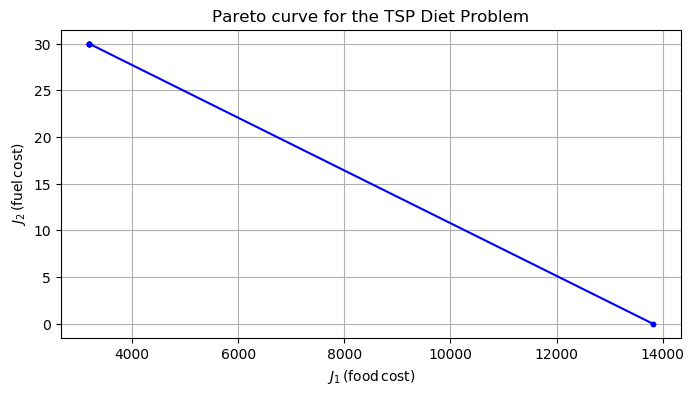

In [28]:
using PyPlot
figure(figsize=(8,4))
plot( J1, J2, "b.-" )
xlabel(L"J_1\, (\sf food\, cost)")
ylabel(L"J_2\, (\sf fuel\, cost)");
title("Pareto curve for the TSP Diet Problem")
grid()

So here we see that in our example, there really isn't a curved front for different outcomes: either you have time to travel, and therefore can get the best price, or you don't, in which case you get a more expensive diet. 

For the fifth scenario, we added a tradeoff for how good the food tastes, or its *deliciousness*, and came up with the following 3D graph. To use, please run the code and enter a number at the prompt (like 30, the default). The graph will display at the observation angle described by your input. (We were not able to implement a click-and-drag graph, akin to those displayed on websites such as Wolfram Mathematica; improving 3D graphics in the Julia programming language is an interesting avenue of further exploration.)

In [29]:
Npts = 10
J1 = zeros(Npts)
J2 = zeros(Npts)
J3 = zeros(Npts)

λ = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
δ = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for j in 1:Npts
    for i in 1:Npts
        (J1[i],J2[i],J3[i]) = solveOpt2(λ[j],δ[i])
    end
end;


[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Soup: 173.0
Apple: 112.00000000000001

Fresh Market:

Trader Joe's:
Cake: 20.0

Cost for Child: $956.0
_________________________

Adult:
Woodmans:
Soup: 300.0
Apple: 300.0

Fresh Market:
Milk: 17.0

Trader Joe's:
Cake: 20.0
Pizza: 35.0

Cost for Adult: $2240.0
_________________________

Total Food Cost: $3196.0
Total Travel Cost: $30.0
Total Overall Cost: $3226.0
3194.0074499999964
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Soup: 173.0
Apple: 112.00000000000001

Fresh Market:

Trader Joe's:
Cake: 20.0

Cost for Child: $956.0
_________________________

Adult:
Woodmans:
Soup: 300.0
Apple: 300.0

Fresh Market:
Milk: 17.0

Trader Joe's:
Cake: 20.0
Pizza: 35.0

Cost for Adult: $2240.0


[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Apple: 1.0

Fresh Market:

Trader Joe's:
Cake: 16.0
Soup: 300.0

Cost for Child: $903334.0
_________________________

Adult:
Woodmans:
Apple: 300.0

Fresh Market:
Milk: 17.0

Trader Joe's:
Cake: 20.0
Pizza: 35.0
Soup: 300.0

Cost for Adult: $904340.0
_________________________

Total Food Cost: $1.807674e6
Total Travel Cost: $30.0
Total Overall Cost: $1.807704e6
995.5129999999975
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:

Fresh Market:

Trader Joe's:
Soup: 300.0
Apple: 65.0

Cost for Child: $910515.0
_________________________

Adult:
Woodmans:

Fresh Market:
Milk: 17.0

Trader Joe's:
Cake: 20.0
Pizza: 35.0
Soup: 300.0
Apple: 300.0

Cost for Adult: $937040.0
_______________________

Cost for Child: $1.0812e6
_________________________

Adult:
Woodmans:
Cake: 20.0
Pizza: 100.00000000000001

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 500.0
Soup: 300.0

Cost for Adult: $1.0812e6
_________________________

Total Food Cost: $2.1624e6
Total Travel Cost: $30.0
Total Overall Cost: $2.16243e6
-1.8083539997000003e8
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Cake: 20.0
Pizza: 100.00000000000001

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 500.0
Soup: 300.0

Cost for Child: $1.0812e6
_________________________

Adult:
Woodmans:
Cake: 20.0
Pizza: 100.00000000000001

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 500.0
Soup: 300.0

Cost for Adult: $1.0812e6
_________________________

Total Food Cost: $2.1624e6
Total Travel Cost: $30.0
Total Overall Cost: $2.16243e6
-1.8278155999699998e9
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 


Adult:
Woodmans:
Soup: 300.0
Apple: 300.0

Fresh Market:
Milk: 17.0

Trader Joe's:
Cake: 20.0
Pizza: 35.0

Cost for Adult: $2240.0
_________________________

Total Food Cost: $3196.0
Total Travel Cost: $30.0
Total Overall Cost: $3226.0
3179.0714999999964
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Soup: 173.0
Apple: 112.00000000000001

Fresh Market:

Trader Joe's:
Cake: 20.0

Cost for Child: $956.0
_________________________

Adult:
Woodmans:
Soup: 300.0
Apple: 300.0

Fresh Market:
Milk: 17.0

Trader Joe's:
Cake: 20.0
Pizza: 35.0

Cost for Adult: $2240.0
_________________________

Total Food Cost: $3196.0
Total Travel Cost: $30.0
Total Overall Cost: $3226.0
2999.7149999999965
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Apple

[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Cake: 20.0
Pizza: 100.00000000000001

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 500.0
Soup: 300.0

Cost for Child: $1.0812e6
_________________________

Adult:
Woodmans:
Cake: 20.0
Pizza: 100.00000000000001

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 500.0
Soup: 300.0

Cost for Adult: $1.0812e6
_________________________

Total Food Cost: $2.1624e6
Total Travel Cost: $30.0
Total Overall Cost: $2.16243e6
-1.829761757e10
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Cake: 20.0
Pizza: 100.00000000000001

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 500.0
Soup: 300.0

Cost for Child: $1.0812e6
_________________________

Adult:
Woodmans:
Cake: 20.0
Pizza: 100.00000000000001

F

Cake: 20.0
Pizza: 35.0

Cost for Adult: $2240.0
_________________________

Total Food Cost: $3196.0
Total Travel Cost: $30.0
Total Overall Cost: $3226.0
6176.071499999996
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Soup: 173.0
Apple: 112.00000000000001

Fresh Market:

Trader Joe's:
Cake: 20.0

Cost for Child: $956.0
_________________________

Adult:
Woodmans:
Soup: 300.0
Apple: 300.0

Fresh Market:
Milk: 17.0

Trader Joe's:
Cake: 20.0
Pizza: 35.0

Cost for Adult: $2240.0
_________________________

Total Food Cost: $3196.0
Total Travel Cost: $30.0
Total Overall Cost: $3226.0
5996.7149999999965
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Apple: 1.0

Fresh Market:

Trader Joe's:
Cake: 16.0
Soup: 300.0

Cost for Child: $903334.0

Cost for Child: $1.0812e6
_________________________

Adult:
Woodmans:
Cake: 20.0
Pizza: 100.00000000000001

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 500.0
Soup: 300.0

Cost for Adult: $1.0812e6
_________________________

Total Food Cost: $2.1624e6
Total Travel Cost: $30.0
Total Overall Cost: $2.16243e6
-1.808054e8
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Cake: 20.0
Pizza: 100.00000000000001

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 500.0
Soup: 300.0

Cost for Child: $1.0812e6
_________________________

Adult:
Woodmans:
Cake: 20.0
Pizza: 100.00000000000001

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 500.0
Soup: 300.0

Cost for Adult: $1.0812e6
_________________________

Total Food Cost: $2.1624e6
Total Travel Cost: $30.0
Total Overall Cost: $2.16243e6
-1.8277856e9
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Op

Cost for Adult: $1.0812e6
_________________________

Total Food Cost: $2.1624e6
Total Travel Cost: $30.0
Total Overall Cost: $2.16243e6
-1.82973176e10
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Cake: 20.0
Pizza: 100.00000000000001

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 500.0
Soup: 300.0

Cost for Child: $1.0812e6
_________________________

Adult:
Woodmans:
Cake: 20.0
Pizza: 100.00000000000001

Fresh Market:
Apple: 300.0

Trader Joe's:
Milk: 500.0
Soup: 300.0

Cost for Adult: $1.0812e6
_________________________

Total Food Cost: $2.1624e6
Total Travel Cost: $30.0
Total Overall Cost: $2.16243e6
-1.829953376e11
[0.0 1.0 0.0 0.0; 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0]
Optimal Path: Home --> Woodmans --> Fresh --> Home
Shopping list (100mg per unit of food)

Child:
Woodmans:
Cake: 20.0
Pizza: 100.00000000000001

Fresh Market:
Apple: 300.

STDIN> 30


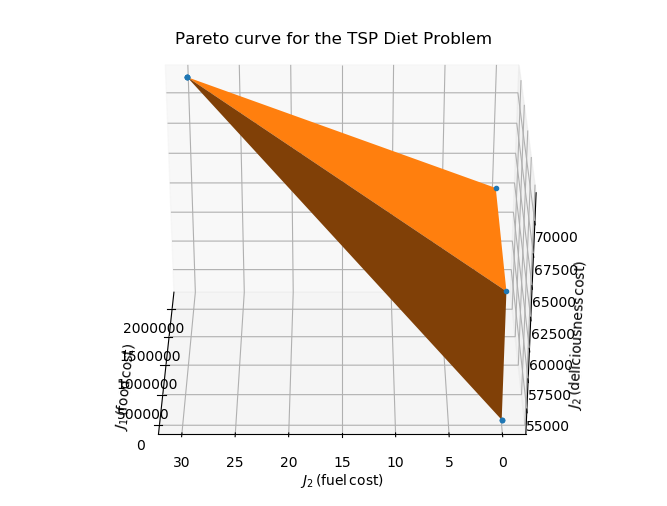

PyObject Text(0.5,0.92,u'Pareto curve for the TSP Diet Problem')

In [30]:
#At the command prompt you can enter your preferred viewing angle.
using PyPlot
fig = figure()
ax = Axes3D(fig)

theAngle = chomp(readline())
theActualAngle = parse(Float64,theAngle)
plot3D(J1,J2,J3, ".")
ax[:view_init](theActualAngle, 180)

surf(J1,J2,J3);
xlabel(L"J_1\, (\sf food\, cost)")
ylabel(L"J_2\, (\sf fuel\, cost)")
zlabel(L"J_2\, (\sf deliciousness\, cost)");
title("Pareto curve for the TSP Diet Problem")

So from the above graph, we can again see that there isn't really much of a curve anywhere. Your choice is a fairly simple decision about which constraints you will prioritize and how you will rank order those factors.

Some final words about the logical constraints we imposed:

- At first our optimal diets recommended a lot of beer for children and a non-negligible amount of infant formula for adults. Since these foods are clearly not age-appropriate, we added constraints limiting alcohol content and requiring that adults not consume baby food.

- In attempting to impose variety on the diets, we noticed that if the upper limits on fruit are too low, an appropriate diet becomes infeasible. Since many disadvantaged areas in America (and other parts of the world) have limited access to fresh, good-quality food, it's possible (indeed probable) that health disparities are enforced by the existence of the aforementioned food deserts.


## 5. Conclusion ##

We would like to explore the time tradeoff involved with incorporating exercise into our diet. 

We would like to further quantify the sensitivity of the problem to additional constraints and the size of the data.

How scalable is the traveling salesman part of the simulation? How many stores must be included before we break the model?

One simulation we would like to consider is applying this principle to restaurant selection. Suppose you are in a new city for a few weeks. How can you select a variety of restaurants to minimize time spent in transit as well as ensuring you have a correct diet?


### TODO:
   - Add taste factor?
   - Finish pareto curve
   - Map showing optimal path
   - Conclusion section
   - Tweaking 
   - ISSUE: The travel cost stays exactly the same when I vary lambda. Can we mess with the model (number of stores, etc) such that I can get different travel costs as I vary lambda?

Annie
   - Fix bounds error after changing # of ages from 2 to 3 
   - Start on discussion section
   - Interactivity
   - Pareto curve (3-way)?
   
Harish
   - Add assumptions
   - Fix max constraint and spreadsheet
   - Fix upper limit data
   - Update print for S1, S2
   - Update optimal path for S3
   - Clean up code
   
Idea?
   - Scenario 4: taste factor